파이썬의 Q,R  분해

In [1]:
import numpy as np
import scipy.linalg

x = np.ones((9,4))
Q,R = scipy.linalg.qr(x)
print(x)
print(Q)
print(R)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[-0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333
  -0.33333333 -0.33333333 -0.33333333]
 [-0.33333333  0.91666667 -0.08333333 -0.08333333 -0.08333333 -0.08333333
  -0.08333333 -0.08333333 -0.08333333]
 [-0.33333333 -0.08333333  0.91666667 -0.08333333 -0.08333333 -0.08333333
  -0.08333333 -0.08333333 -0.08333333]
 [-0.33333333 -0.08333333 -0.08333333  0.91666667 -0.08333333 -0.08333333
  -0.08333333 -0.08333333 -0.08333333]
 [-0.33333333 -0.08333333 -0.08333333 -0.08333333  0.91666667 -0.08333333
  -0.08333333 -0.08333333 -0.08333333]
 [-0.33333333 -0.08333333 -0.08333333 -0.08333333 -0.08333333  0.91666667
  -0.08333333 -0.08333333 -0.08333333]
 [-0.33333333 -0.08333333 -0.08333333 -0.08333333 -0.08333333 -0.08333333
   0.91666667 -0.08333333 -0.08333333]
 [-0.33333333 -0.08333333 -0.08333333 -0.08333333 -0.08333333 -0.08333333

# 텐서플로를 이용한 선형 회귀 예제

In [2]:
%tensorflow_version 1.*

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.*`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
tf.__version__

'1.15.2'

In [5]:
learning_rate = 0.01
num_epochs = 1000
step_display = 50

In [9]:
x = [2.7, 4.8 , 9.3 , 13.4,  24.8,  31.3,  48.5,  53.0,  68.1,  74.2,  88.6, 94.5]
y = [7.0, 28.8, 22.8, 67.1, 48.8, 100.2, 140.0, 190.2, 215.2, 285.6, 260.3, 251.1]

In [10]:
assert len(x) == len(y)
len(x)

12

In [11]:
weight = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='weight')
bias = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='bias')

In [12]:
x_true = tf.placeholder(dtype=tf.float32, name='x_true')
y_true = tf.placeholder(dtype=tf.float32, name='y_true')

In [13]:
y_pred = tf.add(tf.multiply(weight,x_true), bias)

In [14]:
cost = tf.reduce_mean(tf.square(y_pred-y_true))

In [15]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [17]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [19]:
for epoch in range(num_epochs):
    _, c = sess.run([optimizer,cost], feed_dict={x_true:x, y_true:y})
    if (epoch+1) % step_display ==0:
        print("Epoch:{0}, cost: {1} , weight: {2}, bias {3}".format(epoch+1, c, sess.run(weight), sess.run(bias)))
print("최적화 작업을 완로했습니다.") 

Epoch:50, cost: 30246.4140625 , weight: [-0.1331049], bias [0.16059552]
Epoch:100, cost: 22321.2109375 , weight: [0.32539114], bias [0.61945844]
Epoch:150, cost: 16140.5673828125 , weight: [0.7453565], bias [1.0401874]
Epoch:200, cost: 11437.171875 , weight: [1.1253656], bias [1.4214333]
Epoch:250, cost: 7952.533203125 , weight: [1.4645953], bias [1.7624502]
Epoch:300, cost: 5445.158203125 , weight: [1.7629012], bias [2.063168]
Epoch:350, cost: 3696.901611328125 , weight: [2.0209389], bias [2.324308]
Epoch:400, cost: 2518.152587890625 , weight: [2.2402203], bias [2.5474308]
Epoch:450, cost: 1750.96484375 , weight: [2.423092], bias [2.7349162]
Epoch:500, cost: 1269.65478515625 , weight: [2.572626], bias [2.8898485]
Epoch:550, cost: 978.9125366210938 , weight: [2.6924372], bias [3.0158355]
Epoch:600, cost: 809.9407348632812 , weight: [2.7864594], bias [3.1167884]
Epoch:650, cost: 715.5130004882812 , weight: [2.8587036], bias [3.1966817]
Epoch:700, cost: 664.7875366210938 , weight: [2.913

In [20]:
training_cost = sess.run(cost, feed_dict={x_true:x, y_true:y})
print("최종 cost: {}".format(c))
print("최종 weight: {}".format(sess.run(weight)))
print("최종 bias: {}".format(sess.run(bias)))

최종 cost: 614.7534790039062
최종 weight: [3.0317433]
최종 bias: [3.4400055]


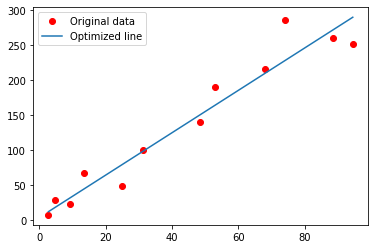

In [21]:
plt.plot(x,y,'ro',label='Original data')
plt.plot(x, sess.run(weight) * x + sess.run(bias), label='Optimized line')
plt.legend()
plt.show()

In [22]:
sess.close()